In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.DataFrame({
    'a': [0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,1,1],
    'b': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'c': [0, 0.01, 0, 0, 0, 0.01, 0, 0, 0, 0, 0, 0, 0.01, 0, 0, 0, 0],
    'on':[0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1]
}, index=pd.date_range('2022-01-01',periods=17, freq='15min' ))

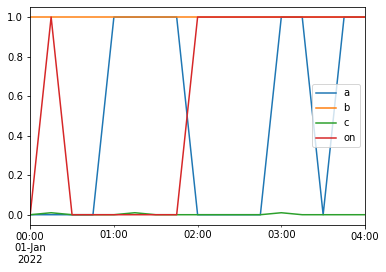

In [3]:
df.plot()

In [4]:
df

,a,b,c,on
2022-01-01 00:00:00,0,1,0.00,0
2022-01-01 00:15:00,0,1,0.01,1
2022-01-01 00:30:00,0,1,0.00,0
2022-01-01 00:45:00,0,1,0.00,0
2022-01-01 01:00:00,1,1,0.00,0
2022-01-01 01:15:00,1,1,0.01,0
2022-01-01 01:30:00,1,1,0.00,0
2022-01-01 01:45:00,1,1,0.00,0
2022-01-01 02:00:00,0,1,0.00,1
2022-01-01 02:15:00,0,1,0.00,1


In [5]:
# Helper function to display the result as graphics
def display(series):
    series.map(float).plot()

# Basic

Rule is a pandas expression

In [6]:
# Greater than than a threshold
df['a'] > 0.5

2022-01-01 00:00:00    False
2022-01-01 00:15:00    False
2022-01-01 00:30:00    False
2022-01-01 00:45:00    False
2022-01-01 01:00:00     True
2022-01-01 01:15:00     True
2022-01-01 01:30:00     True
2022-01-01 01:45:00     True
2022-01-01 02:00:00    False
2022-01-01 02:15:00    False
2022-01-01 02:30:00    False
2022-01-01 02:45:00    False
2022-01-01 03:00:00     True
2022-01-01 03:15:00     True
2022-01-01 03:30:00    False
2022-01-01 03:45:00     True
2022-01-01 04:00:00     True
Freq: 15T, Name: a, dtype: bool

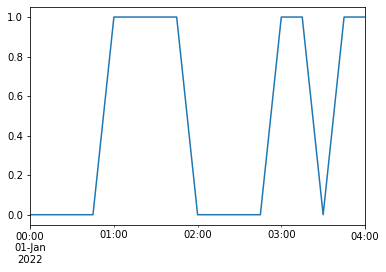

In [7]:
# display bring the above textual representation into the following chart
display(df['a'] > 0.5)

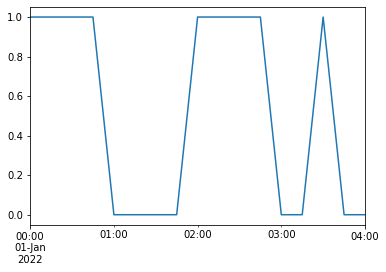

In [8]:
# less than
display(df['a'] < 0.5)

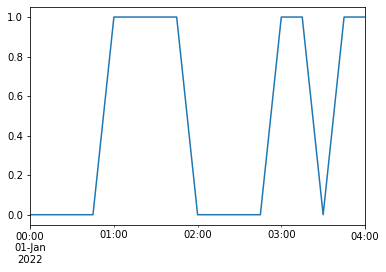

In [9]:
# equality
display(df['a'] == 1)

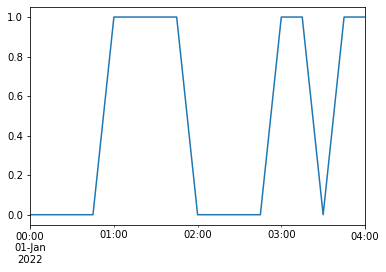

In [10]:
# Compare with other series
display(df['a'] == df['b'])

# rolling calculation
Rolling min, max, sum are useful to express rules that trigger when happen for prolonged period

## Multiple other ways of expressing 'a' is greater than 0 for 4 observations consecutively 



### Method 1

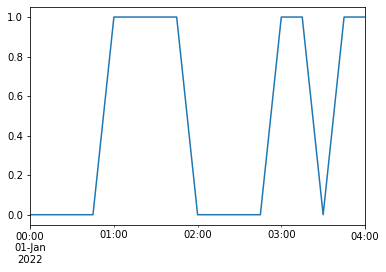

In [11]:
# i. calculate a>0
display(df['a']>0)

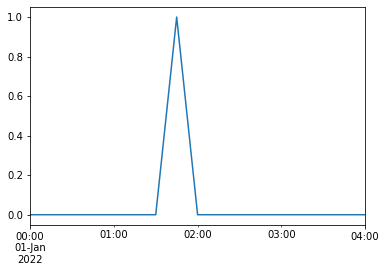

In [12]:
# ii. calculate the rolling minimum for 4 observations, as True=1 and False=0, rolling(4).min() would be 1 if all 4 observ
display( (df['a']>0).rolling(4).min() > 0 )

### Method 2

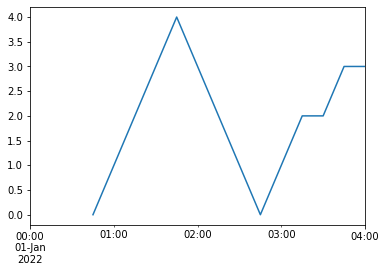

In [13]:
# i. calculate a>0 (same as above)
# ii. calculate the rolling sum for 4 observations
display( (df['a']>0).rolling(4).sum())

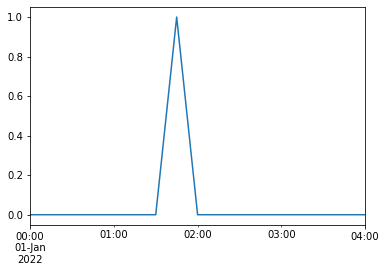

In [14]:
# iii. trigger when the rolling sum==4
display( (df['a']>0).rolling(4).sum()==4)

### Method 3

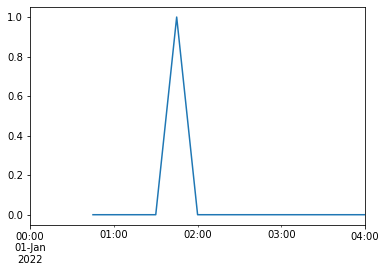

In [15]:
# i. calculate rolling minimum of the value
display( df['a'].rolling(4).min() )

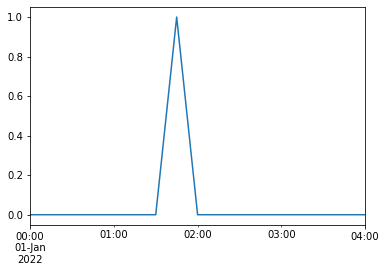

In [16]:
# ii. trigger when rolling minimum is greater than 0
display( df['a'].rolling(4).min() > 0)

# Detect Flatline / Near flatline

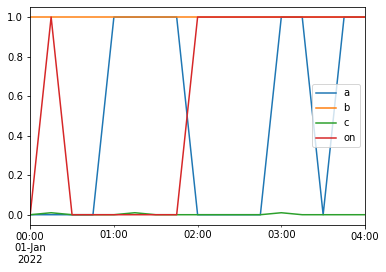

In [17]:
df.plot()

### method 1

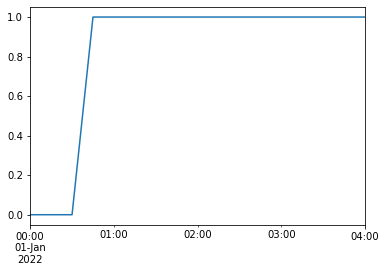

In [18]:
# rolling max - rolling min has little change
display( (df['c'].rolling(4).max() - df['c'].rolling(4).min()) <= 0.05 )

### method 2

In [19]:
# diff return the change in value from previous timestamp
df['c'].diff()

2022-01-01 00:00:00     NaN
2022-01-01 00:15:00    0.01
2022-01-01 00:30:00   -0.01
2022-01-01 00:45:00    0.00
2022-01-01 01:00:00    0.00
2022-01-01 01:15:00    0.01
2022-01-01 01:30:00   -0.01
2022-01-01 01:45:00    0.00
2022-01-01 02:00:00    0.00
2022-01-01 02:15:00    0.00
2022-01-01 02:30:00    0.00
2022-01-01 02:45:00    0.00
2022-01-01 03:00:00    0.01
2022-01-01 03:15:00   -0.01
2022-01-01 03:30:00    0.00
2022-01-01 03:45:00    0.00
2022-01-01 04:00:00    0.00
Freq: 15T, Name: c, dtype: float64

In [20]:
# take the absolute value by removing the sign
df['c'].diff().abs()

2022-01-01 00:00:00     NaN
2022-01-01 00:15:00    0.01
2022-01-01 00:30:00    0.01
2022-01-01 00:45:00    0.00
2022-01-01 01:00:00    0.00
2022-01-01 01:15:00    0.01
2022-01-01 01:30:00    0.01
2022-01-01 01:45:00    0.00
2022-01-01 02:00:00    0.00
2022-01-01 02:15:00    0.00
2022-01-01 02:30:00    0.00
2022-01-01 02:45:00    0.00
2022-01-01 03:00:00    0.01
2022-01-01 03:15:00    0.01
2022-01-01 03:30:00    0.00
2022-01-01 03:45:00    0.00
2022-01-01 04:00:00    0.00
Freq: 15T, Name: c, dtype: float64

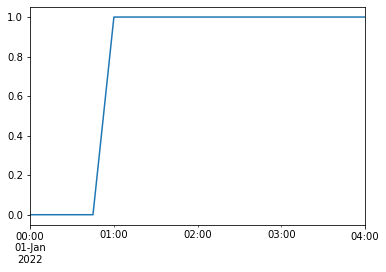

In [21]:
# calculate the rolling sum of the change in values
display( df['b'].diff().abs().rolling(4).sum() < 0.1 )

# Shortcycling

On and off rapidly

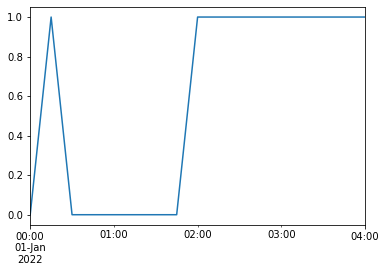

In [22]:
df['on'].plot()

### Method 1

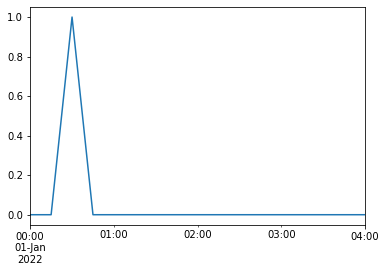

In [23]:
# detect change more than or equal to 2 times
display( df['on'].diff().abs().rolling(2).sum()>=2 )

### Method 2

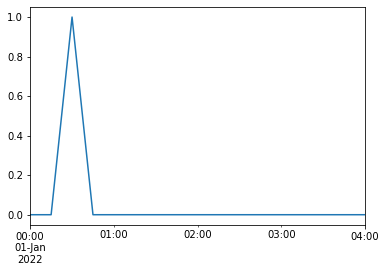

In [24]:
# explicitly named pattern like 0 -> 1 -> 0
display( (df['on']==0) & (df['on'].shift(1)==1) & (df['on'].shift(2)==0) )

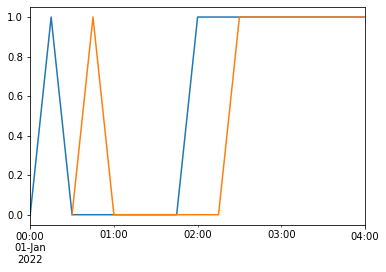

In [25]:
# shift provide a time shifted value for comparison
display(df['on'])
display(df['on'].shift(2))

# Boolean operation

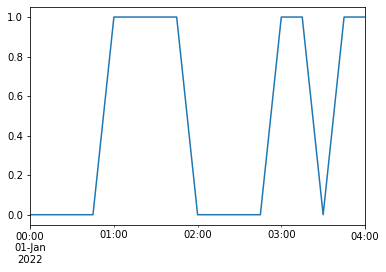

In [26]:
# a>0 and b>0
# bracket is important!
display( (df['a']>0) & (df['b']>0) )

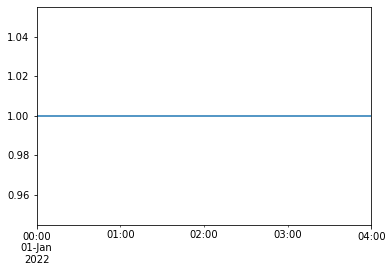

In [27]:
# a>0 or b>0
# bracket is important!
display( (df['a']>0) | (df['b']>0) )

In [28]:
# paste and run the code and see it failed